In [1]:
import numpy as np
A=np.array([[3,7],[-4,-6],[7,8],[1,-1],[-4,-1],[-3,-7]])

In [2]:
A    #1st col 1 X1 and 2nd X2

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [4]:
A.shape

(6, 2)

In [ ]:
# imp points

# *dataset should be normalised
# *for pca dataset should be scaled

In [7]:
import pandas as pd
df= pd.DataFrame(A,columns=['X1','X2'])
df

,X1,X2
0,3,7
1,-4,-6
2,7,8
3,1,-1
4,-4,-1
5,-3,-7


In [8]:
#first we have to find covariance between the columns
#cov(c1,c2)= summation of (c1-c1')(c2-c2')/m-1       #c1' and c2' means avg of respective columns

# ex-
# cov of x1 and x2:-
# x1'=0, x2'=0
# cov= (3-0)(7-0)/5 + (-4-0)(-6-0)/5 + (7-0)(8-0)/5.....+(-3-0)(-7-0)/5 = 25

In [18]:
x1=A[:,0]
x1

array([ 3, -4,  7,  1, -4, -3])

In [19]:
x2=A[:,1]
x2

array([ 7, -6,  8, -1, -1, -7])

In [21]:
np.cov(x1,x2)               #the other diagonal which shows 25,25 shows covariance , cov is 25   
                        #this cov represents the best fitted line for the dataset 

array([[20., 25.],
       [25., 40.]])

In [26]:
#manually calc cov
sum(x1*x2/5)

25.0

In [33]:
#using matrix                      #cov = (Transpose of A . A)/m-1 
sigma=(A.T @ A)/5
sigma

array([[20., 25.],
       [25., 40.]])

In [35]:
np.linalg.eig(sigma)        #eig value of PC1 will be the greater one , ex- 56.92 is ev of PC1

(array([ 3.07417596, 56.92582404]),
 array([[-0.82806723, -0.56062881],
        [ 0.56062881, -0.82806723]]))

In [36]:
l,x= np.linalg.eig(sigma)

In [37]:
l              #eigen values

array([ 3.07417596, 56.92582404])

In [38]:
x               #eigen vectors

array([[-0.82806723, -0.56062881],
       [ 0.56062881, -0.82806723]])

In [48]:
sigma

array([[20., 25.],
       [25., 40.]])

In [49]:
sigma@x

array([[ -2.54562438, -31.91425695],
       [  1.72347161, -47.13840945]])

In [46]:
sigma@x[:,0]

array([-2.54562438,  1.72347161])

In [47]:
sigma@x[:,1]

array([-31.91425695, -47.13840945])

In [50]:
print("PC1")
x[:,1]

PC1


array([-0.56062881, -0.82806723])

In [51]:
print("PC2")
x[:,0]

PC2


array([-0.82806723,  0.56062881])

In [53]:
pc1_arr= A@ x[:,1]                                  #rotating the pc1
pc1_arr

array([ -7.47835704,   7.21091862, -10.54893951,   0.26743842,
         3.07058247,   7.47835704])

In [55]:
pc2_arr=A@ x[:,0]
pc2_arr

array([ 1.44019997, -0.05150393, -1.31144014, -1.38869604,  2.75164011,
       -1.44019997])

In [123]:
df=pd.read_csv("glass.data.csv",names=['index','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Class'])

In [124]:
df1=df.drop(labels=['index','Class'],axis=1)
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [125]:
#check if avg(mean) of all of this dataset is 0 or not and std dev of dataset is 1 or not
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
#we can see mean is not 0 and std dev is not 1
#so we will convert this using standard scaler

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

In [133]:
df1= pd.DataFrame(df_scaled)

In [128]:
df_scaled
df_scaled.shape

(214, 9)

In [129]:
df1.describe()

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [71]:
# we can see mean is close to 0 and std dev is 1.

In [130]:
sigma=np.cov(df_scaled)              #fitting the best line      #ask where are fitting the best line
sigma

array([[ 0.61967223,  0.1554839 ,  0.0095123 , ..., -0.36961439,
        -0.55499756, -0.52499357],
       [ 0.1554839 ,  0.23446913,  0.20927571, ..., -0.10528676,
        -0.06703188, -0.11242412],
       [ 0.0095123 ,  0.20927571,  0.26700812, ..., -0.07709654,
         0.03531121, -0.01133884],
       ...,
       [-0.36961439, -0.10528676, -0.07709654, ...,  2.02504465,
         1.91941657,  1.96842824],
       [-0.55499756, -0.06703188,  0.03531121, ...,  1.91941657,
         2.03457864,  2.03557203],
       [-0.52499357, -0.11242412, -0.01133884, ...,  1.96842824,
         2.03557203,  2.07393387]])

In [100]:
l,x= np.linalg.eig(sigma)

In [101]:
l                    #this is not giving right value , it should be equal to  no of columns

array([ 6.71592738e+01+0.00000000e+00j,  5.22063997e+01+0.00000000e+00j,
        3.61289031e+01+0.00000000e+00j,  3.08518650e+01+0.00000000e+00j,
        2.20284946e+01+0.00000000e+00j,  1.41097180e+01+0.00000000e+00j,
        9.67342811e+00+0.00000000e+00j,  1.37509003e+00+0.00000000e+00j,
       -5.71277202e-15+0.00000000e+00j, -3.73019328e-15+0.00000000e+00j,
        3.09799998e-15+9.82653729e-16j,  3.09799998e-15-9.82653729e-16j,
        2.85604001e-15+3.23332735e-16j,  2.85604001e-15-3.23332735e-16j,
       -2.79819763e-15+0.00000000e+00j, -2.52596121e-15+9.91721561e-16j,
       -2.52596121e-15-9.91721561e-16j, -2.22407170e-15+1.32095367e-15j,
       -2.22407170e-15-1.32095367e-15j, -1.23519034e-15+1.94914598e-15j,
       -1.23519034e-15-1.94914598e-15j,  7.41298578e-16+2.11000808e-15j,
        7.41298578e-16-2.11000808e-15j,  1.97918798e-15+8.39931659e-16j,
        1.97918798e-15-8.39931659e-16j, -2.07551447e-15+3.41115551e-16j,
       -2.07551447e-15-3.41115551e-16j,  1.48074888

In [102]:
x

array([[ 4.90209703e-02+0.j        , -1.90749481e-02+0.j        ,
         1.30131230e-02+0.j        , ..., -1.10941391e-03-0.00658439j,
        -1.01979150e-03+0.j        ,  4.10463936e-17+0.j        ],
       [-2.54779283e-02+0.j        , -3.02791993e-02+0.j        ,
         3.04687772e-02+0.j        , ...,  8.97558157e-03-0.00832674j,
        -1.05309675e-02+0.j        , -7.99813412e-16+0.j        ],
       [-4.14305893e-02+0.j        , -3.74402800e-02+0.j        ,
         3.21633520e-02+0.j        , ..., -6.15160789e-03+0.00120914j,
         1.45807417e-02+0.j        ,  1.08776995e-15+0.j        ],
       ...,
       [-7.00531319e-02+0.j        ,  1.55988054e-01+0.j        ,
         4.51735795e-02+0.j        , ..., -2.77707841e-02+0.02455837j,
         5.00461456e-02+0.j        ,  2.75188709e-15+0.j        ],
       [-1.00380258e-01+0.j        ,  1.36080982e-01+0.j        ,
         6.35360864e-02+0.j        , ...,  3.43446641e-02-0.0186131j ,
        -5.48650640e-02+0.j        

In [79]:
#so lets try to calc eigen value manually, we guessed something was wrong with sigma , so calc sigma manually

In [103]:
l,x= np.linalg.eig(df_scaled.T @ df_scaled/213)

In [104]:
l

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

In [105]:
x

array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
        -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
       [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
         0.55811757, -0.14858006, -0.12769315, -0.31193718],
       [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
        -0.30818598,  0.20604537, -0.07689061, -0.57727335],
       [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
         0.01885731,  0.69923557, -0.27444105, -0.19222686],
       [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
        -0.08609797, -0.21606658, -0.37992298, -0.29807321],
       [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
         0.24363237, -0.50412141, -0.10981168, -0.26050863],
       [-0.49230609,  0.3453798 , -0.00098473,  0.27644322,  0.18818774,
         0.14866937,  0.09913463,  0.39870468, -0.57932321],
       [ 0.25037512,  0.48470218,  0.07405473, -0.13317545, -0

In [107]:
pc1_data= df_scaled @ x[:,0]                  #rotating the data , pc1 is for which eig val is max
                                           #we'll have PC1, PC2, .....PC9

In [108]:
pc1_data.shape

(214,)

In [121]:
pc1_data

array([-1.15113957e+00,  5.74137172e-01,  9.40159722e-01,  1.42083283e-01,
        3.51092291e-01,  2.90266583e-01,  2.52671444e-01,  1.20299466e-01,
        2.08160308e-02,  2.35222894e-03,  3.82514937e-01,  1.33538675e-02,
        3.09724390e-01, -1.56521013e-01,  8.99566628e-02,  1.15255023e-01,
       -1.73458320e-01, -1.45812372e+00, -5.47316267e-01,  3.08817022e-01,
       -2.05673879e-01, -1.21605345e+00, -4.11679297e-02,  1.13206012e-01,
        1.47523366e-01,  5.04865218e-02,  1.55773980e-01,  2.17093779e-01,
        1.15093633e-01,  6.58374915e-02, -2.98261451e-01,  2.22363433e-02,
       -3.96586112e-01,  6.90862734e-02, -8.17537725e-02,  3.88918640e-01,
       -2.57422809e-01, -2.70430953e-02, -1.93311245e+00, -1.93311245e+00,
       -2.13978802e-01, -1.73653764e-02,  9.91042449e-02, -1.90784649e+00,
       -7.55238909e-01, -4.15149070e-01, -6.04423395e-01, -2.97136159e+00,
       -2.07281161e+00, -3.93111591e-01, -2.72721095e+00, -7.23068883e-01,
       -1.06160451e-01, -

In [109]:
pc2_data= df_scaled @ x[:,1]

In [110]:
pc2_data

array([-0.52948764, -0.75978777, -0.92983597, -0.96167744, -1.09124921,
       -1.32400756, -1.11614958, -1.22184622, -0.32193261, -1.06581344,
       -1.38013403, -1.10471913, -1.42304024, -1.23592823, -1.18125211,
       -1.16028212, -1.18243967,  0.09884138, -0.29566013, -0.76316216,
       -0.99918266, -0.43689611, -1.02788338, -1.02762181, -0.93376705,
       -1.04723075, -0.73814955, -1.03946718, -1.05293936, -0.90287584,
       -1.16489328, -1.16273745, -1.07307343, -1.16390421, -0.96601943,
       -1.00978004, -0.09893604, -0.94115087, -0.1421143 , -0.1421143 ,
       -1.06505169, -1.10093167, -0.74680692, -0.13514622, -1.19430193,
       -0.29328726, -0.78019985,  0.4631405 , -0.19367388, -0.34025819,
       -0.11303858, -0.47489193, -0.41450604, -0.4099579 , -0.51028779,
       -0.97207179, -1.81655603, -0.95745406, -1.10236197, -1.05432062,
       -0.5519114 ,  0.5683302 , -0.2964757 ,  0.18518682, -0.23485117,
       -0.0168166 , -0.42701387, -0.44708532, -0.36349866,  0.02

In [ ]:
#how can we validate if our have generated PC1...9 is right or not.
# we can use the sckitlearn lib to check if what we created manually is right or not

In [119]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)               #calc here only for PC1 and PC2

In [134]:
pca.fit_transform(df1)                 

array([[ 1.15113957e+00, -5.29487638e-01],
       [-5.74137172e-01, -7.59787774e-01],
       [-9.40159722e-01, -9.29835966e-01],
       [-1.42083283e-01, -9.61677440e-01],
       [-3.51092291e-01, -1.09124921e+00],
       [-2.90266583e-01, -1.32400756e+00],
       [-2.52671444e-01, -1.11614958e+00],
       [-1.20299466e-01, -1.22184622e+00],
       [-2.08160308e-02, -3.21932609e-01],
       [-2.35222894e-03, -1.06581344e+00],
       [-3.82514937e-01, -1.38013403e+00],
       [-1.33538675e-02, -1.10471913e+00],
       [-3.09724390e-01, -1.42304024e+00],
       [ 1.56521013e-01, -1.23592823e+00],
       [-8.99566628e-02, -1.18125211e+00],
       [-1.15255023e-01, -1.16028212e+00],
       [ 1.73458320e-01, -1.18243967e+00],
       [ 1.45812372e+00,  9.88413780e-02],
       [ 5.47316267e-01, -2.95660130e-01],
       [-3.08817022e-01, -7.63162157e-01],
       [ 2.05673879e-01, -9.99182661e-01],
       [ 1.21605345e+00, -4.36896108e-01],
       [ 4.11679297e-02, -1.02788338e+00],
       [-1.

In [ ]:
#on comparing pc1_data anf the 1st column same for pc2 we can see that they match so we were correct

In [ ]:
#so now we will find how many pc's are req for explaining the data

In [137]:
pca=PCA()

In [139]:
principal_component=pca.fit_transform(df1)

Text(0, 0.5, 'eVR')

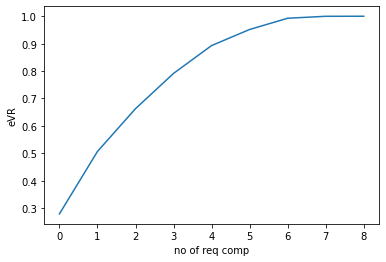

In [144]:
import matplotlib.pyplot as plt
plt.figure
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("no of req comp")
plt.ylabel("eVR")

In [143]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [145]:
# we can see in the graph that 5 pc's can explain 90% dataset , so we build a new dataset with pc's

In [149]:
pca1= PCA(n_components=5)
new_data= pca1.fit_transform(df1)

In [150]:
new_data

array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583],
       [-0.57413717, -0.75978777, -0.55670817,  0.76023228, -0.25707069],
       [-0.94015972, -0.92983597, -0.55490744,  0.20625431, -0.23750587],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, -0.17101386,  0.45168739],
       [-2.36974768,  2.7568728 , -1.23470076, -0.52528451,  0.51500795],
       [-2.26264885,  3.02859155, -0.89084474, -0.41449108,  0.50547398]])

In [152]:
x=pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5'])
x

,PC1,PC2,PC3,PC4,PC5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090
...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227
210,-2.397652,3.108236,-1.117502,0.288454,0.624723
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008


In [153]:
#Ex of using PCA in Decision tree

In [156]:
data1= df
data1

,index,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [158]:
y= data1['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Class, Length: 214, dtype: int64

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree 

In [160]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x,y)

DecisionTreeClassifier()

In [163]:
dt_model.predict(pca1.transform(scaler.transform([[1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0]])))

array([1])